[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


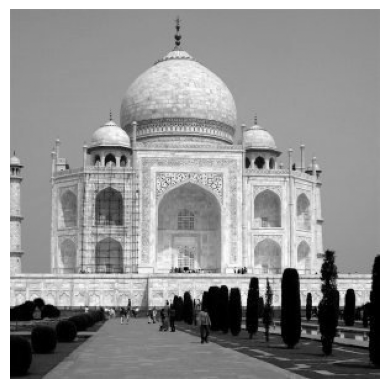

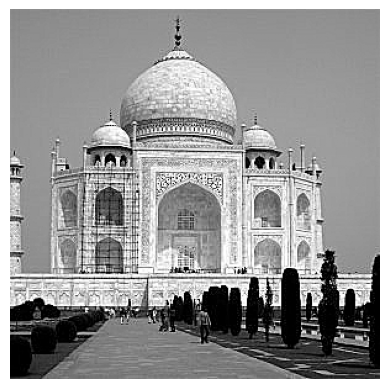

In [ ]:
from scipy.signal import convolve2d
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
import cv2

gaussian_1d = cv2.getGaussianKernel(ksize=5, sigma=1)
G = gaussian_1d @ gaussian_1d.T
print(G)
alpha = 1

def sharpen1(im):
    im = im + alpha*(im - convolve2d(im, G, mode='same', boundary='symm'))
    return np.clip(im, 0, 1)

def unsharp(im):
    H = -(alpha * G)
    H[2, 2] += (1 + alpha)
    return np.clip(convolve2d(im, H, mode='same', boundary='symm'), 0, 1)

im = skio.imread('data/taj.jpg', as_gray=True)
im = sk.img_as_float(im)
im_sharp1 = sharpen1(im)
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.show()

plt.axis('off')
plt.imshow(im_sharp1, cmap='gray')
plt.show()